# Import Library

In [1]:
import numpy as np
import pandas as pd

import cv2

import matplotlib.pyplot as plt
from PIL import  Image

import os
import os.path as op
from os import listdir
from glob import glob
import shutil

from skimage import io
from skimage import filters
from skimage import morphology

# Plot Function

In [4]:
def subplot_image_img(imgs = [] , titles = [], n_row=None , n_col=None, flag=1 , cmap = 'gray' , axis='off') :
    n = len(imgs)
    
    if len(titles) == 0 :
        for i in range(n) : titles.append(i+1)
    
    if n_row == None or n_col==None:
        n_row = 1
        n_col = n
    
    for i in range(n) :
        plt.subplot(n_row , n_col , i+1)
        plt.imshow(imgs[i] , cmap)
        plt.title(titles[i])
        plt.axis(axis)

In [5]:
def subplot_image_path(paths = [], n_row=1 , n_col=1, flag=1 , cmap = 'gray' , axis='off') :
    n = len(paths)
    
    for path in paths : print(path , end=' ')
    
    for i in range(n) :
        plt.subplot(n_row , n_col , i+1)
        plt.imshow(cv2.imread(paths[i],flag) , cmap)
        plt.title(op.basename(paths[i]).replace(".jpg" , ""))
        plt.axis(axis)

# Input Image

In [4]:
root_input = 'input/sample'

In [5]:
input_path = [f"{root_input}/{name}" for name in listdir(root_input + '/')]
print(input_path)

['input/sample/spiral1.jpg', 'input/sample/spiral2.jpg', 'input/sample/spiral3.jpg']


input/sample/spiral1.jpg input/sample/spiral2.jpg input/sample/spiral3.jpg 

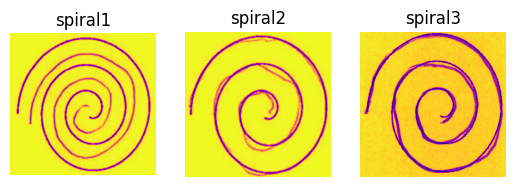

In [6]:
subplot_image_path(input_path , 1 , len(input_path) , 0 , 'plasma')

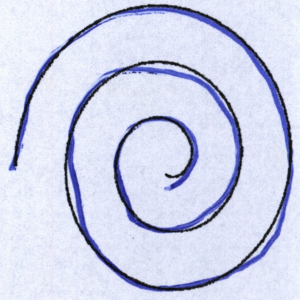

In [7]:
Image.open(input_path[2]).resize((300,300))

# Component
1) black line
2) plain white background

In [8]:
grand_parent = "component"

if not op.exists(f"{grand_parent}") :
    os.makedirs(f"{grand_parent}")

## Black line

In [9]:
root = f"{grand_parent}/blackline"

if not op.exists(f"{root}") :
    os.makedirs(f"{root}")

### Extract black line

In [10]:
path = input_path[0]

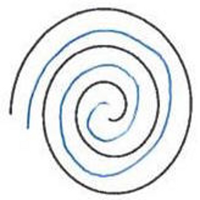

In [11]:
Image.open(path).resize((200,200))

In [12]:
img = cv2.imread(path)

lower_black = np.array([0, 0, 0])
upper_black = np.array([95, 95, 95])

black_line = np.full(shape=img.shape , fill_value=255)

dim = img.shape

for i in range(dim[0]) :
    for j in range(dim[1]) :
        if (lower_black<=img[i][j]).all() and (img[i][j]<=upper_black).all() :
            black_line[i][j] = 0

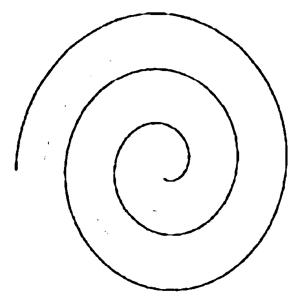

In [13]:
cv2.imwrite(f"{root}/blackline.jpg" , black_line)
Image.open(f"{root}/blackline.jpg").resize((300,300))

In [14]:
blackline_path = f"{root}/blackline.jpg"

C:\Users\Siravit\AppData\Local\Temp\ipykernel_20796\492067782.py:4: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  rsh_img = morphology.remove_small_holes(bimage,area_threshold=33)


(-0.5, 674.5, 658.5, -0.5)

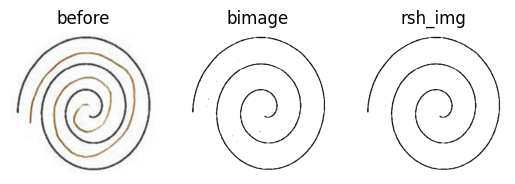

In [15]:
image = cv2.imread(blackline_path,0)
threshold = filters.threshold_otsu(image)
bimage = np.where(image>threshold,255,0)
rsh_img = morphology.remove_small_holes(bimage,area_threshold=33)

plt.subplot(1,3,1)
plt.imshow(img , 'gray')
plt.title('before')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(bimage , 'gray')
plt.title('bimage')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(rsh_img, 'gray')
plt.title('rsh_img')
plt.axis('off')

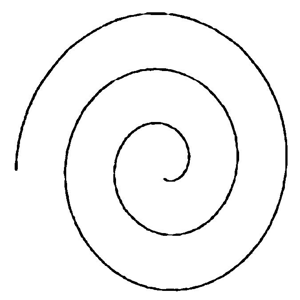

In [16]:
plt.imsave(f"{root}/blackline_cleaned.jpg" , rsh_img , cmap='gray')
Image.open(f"{root}/blackline_cleaned.jpg").resize((300,300))

In [17]:
blackline_path = f"{root}/blackline_cleaned.jpg"
print(blackline_path)

component/blackline/blackline_cleaned.jpg


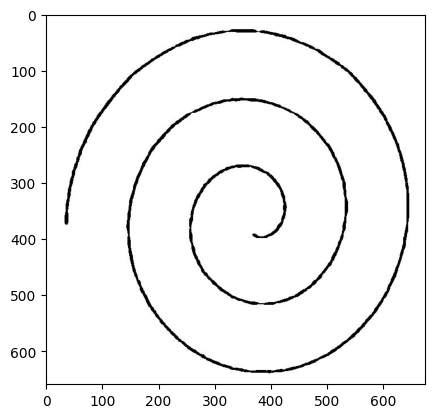

In [18]:
img = cv2.imread(blackline_path , 0)
plt.imshow(img , 'gray')

In [19]:
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  43,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
       242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255], dtype=uint8)

In [20]:
dim = img.shape
black_line_binary = np.full(dim , fill_value=255)

for i in range(dim[0]) :
    for j in range(dim[1]) :
        if img[i][j] <= 50 : black_line_binary[i][j] = 0
        else : black_line_binary[i][j] = 255

In [21]:
np.unique(black_line_binary)

array([  0, 255])

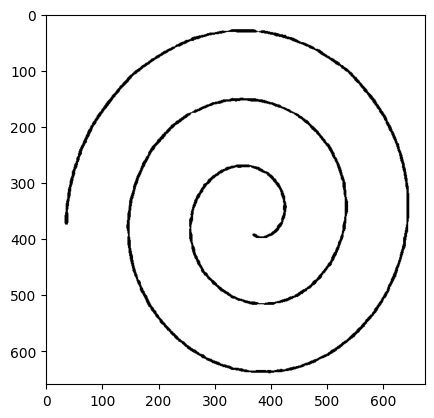

In [22]:
plt.imshow(black_line_binary , 'gray')

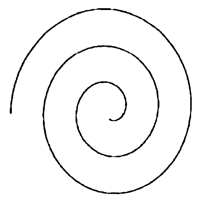

In [23]:
cv2.imwrite(f"{root}/blackline_binary.jpg" , black_line_binary)
Image.open(f"{root}/blackline_binary.jpg").resize((200,200))

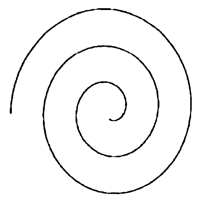

In [24]:
blackline_path = f"{root}/blackline_binary.jpg"
Image.open(blackline_path).resize((200,200))

#### Black line's coordinate

In [25]:
img = black_line_binary

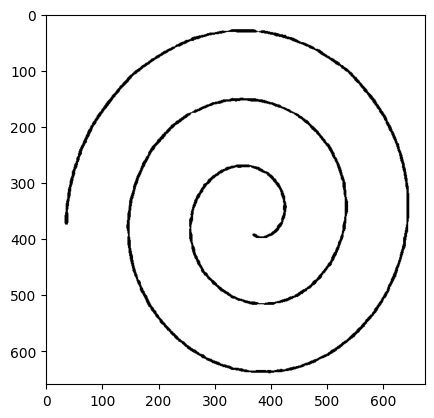

In [26]:
plt.imshow(img , 'gray')

In [27]:
np.unique(img)

array([  0, 255])

In [28]:
blackline_coordinate = np.argwhere(img<=100)

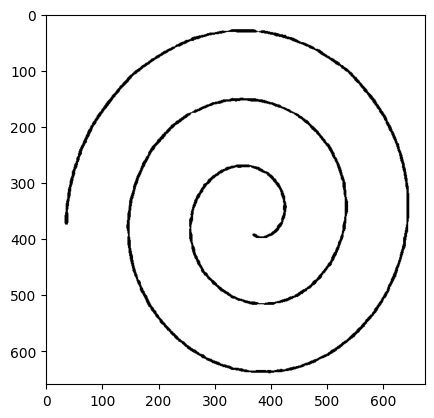

In [29]:
dummy = np.full(img.shape , fill_value=255)

for x,y in blackline_coordinate :
    dummy[x][y] = 0

plt.imshow(dummy , 'gray')

## Plain white background

In [30]:
root = f"{grand_parent}/plainwhite_background"

if not op.exists(root) :
    os.makedirs(root)

In [31]:
path = input_path[0]
img = cv2.imread(path , 0)

In [32]:
img.shape

(659, 675)

In [33]:
white_background = np.full(img.shape , fill_value=255)
cv2.imwrite(f"{root}/white_background.jpg" , white_background)

True

In [34]:
white_background_path = f"{root}/white_background.jpg"

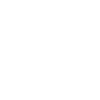

In [35]:
Image.open(white_background_path).resize((100,100))

# Extract blue line

In [36]:
root_black_line = 'component\blackline'
root_background = 'component\plainwhite_background'

In [37]:
root = 'output'

if not op.exists(root) :
    os.makedirs(root)

## Filter by HSV range

In [38]:
def extract_Blueline_filter_HSV(path) :
    img = cv2.imread(path)

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([100,50,50])
    upper_blue = np.array([140, 255, 255])

    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    mask_inv = cv2.bitwise_not(mask)

    is_blue = mask_inv

    cv2.imwrite('output/filter_hsv.jpg',is_blue )

    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(is_blue)
    plt.axis('off')

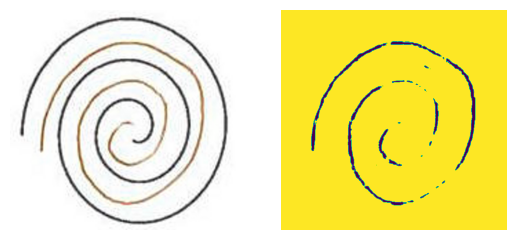

In [39]:
extract_Blueline_filter_HSV(input_path[0])

## Remove Black line

In [40]:
black_line_binary = cv2.imread('component/blackline/blackline_binary.jpg' , 0)

In [41]:
black_line_binary[black_line_binary > 220] = 255
black_line_binary[black_line_binary <= 200] = 0

In [42]:
np.unique(black_line_binary)

array([  0, 255], dtype=uint8)

In [43]:
def remove_blackline(path  ,r=5) :
    img = cv2.imread(path)

    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title(path)

    for x,y in blackline_coordinate :
        for i in range(max(0 , x-r) , min(img.shape[0],x+r)) :
            for j in range(max(0 , y-r) , min(img.shape[1] , y+r)) :
                img[i][j] = [255,255,255]

    plt.subplot(1,3,2)
    plt.imshow(black_line_binary)

    plt.subplot(1,3,3)
    plt.imshow(img , 'bone')

    cv2.imwrite(f"output/removed_blackline.jpg" , img)
    return f"output/removed_blackline.jpg"

## Connect Line

In [44]:
def connect_line(path , r=15) :
    img_input = cv2.imread(path , 0)
    
    dim = img_input.shape
    
    img = np.full(dim , fill_value=255)
    
    for i in range(dim[0]) :
        for j in range(dim[1]) :
            if(img_input[i][j] <= 200) : img[i][j] = 0
            else : img[i][j] = 255
    
    paper = np.full(img.shape , fill_value=255)

    for x,y in blackline_coordinate :
        have = False
        for i in range(max(0 , x-r) , min(img.shape[0] , x+r)) :
            for j in range(max(0 , y-r) , min(img.shape[1] , y + r)) :
                if img[i][j] != 255 : have = True
                if have : break
            if have : break
        if not have : paper[i][j] = 0

    paper_merge = np.full(paper.shape , fill_value=0)
    
    dim = paper.shape
    
    for i in range(dim[0]) :
        for j in range(dim[1]) :
            if img[i][j]==255 and paper[i][j]==255 :
                paper_merge[i][j] = 255
            else :
                paper_merge[i][j] = 0
    
    cv2.imwrite('output/merged_paper.jpg' , paper_merge)
    
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(path , 0))

    plt.subplot(1,3,2)
    plt.imshow(img)

    plt.subplot(1,3,3)
    plt.imshow(paper_merge)
    
    # return paper_merge    
    return 'output/merged_paper.jpg'

## Testing

'output/removed_blackline.jpg'

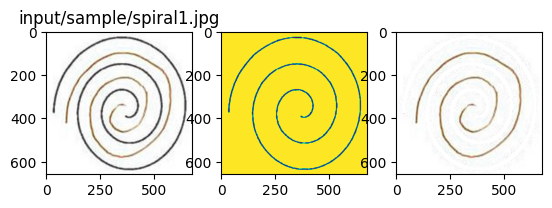

In [45]:
remove_blackline(input_path[0] , 5)

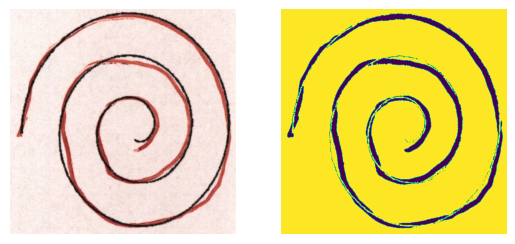

In [46]:
extract_Blueline_filter_HSV(input_path[2])

'output/removed_blackline.jpg'

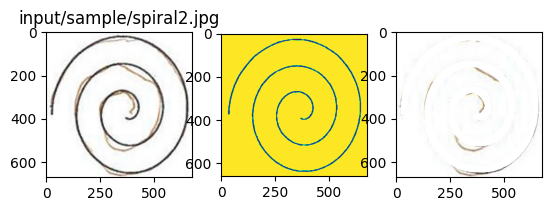

In [47]:
remove_blackline(input_path[1] , 12)

'output/merged_paper.jpg'

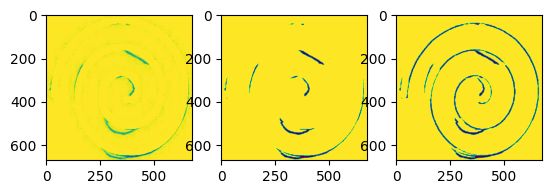

In [48]:
connect_line('output/removed_blackline.jpg')

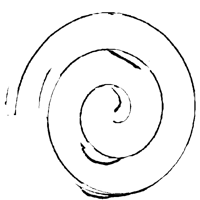

In [49]:
Image.open('output/merged_paper.jpg').resize((200,200))

# Turn To Black and White

In [8]:
def turn2_binary(path , bound=200) :
    img = cv2.imread(path , 0)
    for i in range(img.shape[0]) :
        for j in range(img.shape[1]) :
            if img[i][j] <= bound : img[i][j] = 0
            else : img[i][j] = 255
    cv2.imwrite('output/black_white_img.jpg' , img)
    return 'output/black_white_img.jpg'

In [9]:
def turn2_binary_floodfill(path) :
    img = cv2.imread(path , 0)
    dummy = np.copy(img)
    
    vis = np.full(img.shape , fill_value=False)
    
    unique_val , val_count = np.unique(img , return_counts=True)
    
    df = pd.DataFrame(zip(unique_val , val_count) , columns=['value' , 'count'])
    df_sorted = df.sort_values(by = ['count'] , ascending=False)
    
    top_val = df_sorted[:4]
    top_val = top_val.sort_values(by = 'value')
    
    lim_diff = top_val['value'].iloc[-1] - top_val['value'].iloc[0]
    
    q = []

    for val in top_val['value'] :
        coordinate = np.argwhere(img == val)
        for x,y in coordinate : 
            vis[x][y] = True
            dummy[x][y] = 255
            q.append([x,y])
    
    while len(q) > 0 :
        curr_x , curr_y = q[0]
        q.pop(0)
        
        print(len(q))
        
        for i in [-1 , 0 , 1] :
            for j in [-1 , 0 , 1] :
                next_x , next_y = x + i , y + j
                
                if next_x<0 or next_x>=img.shape[0] or next_y<0 or next_y>=img.shape[1] : continue
                if vis[next_x][next_y] : continue
                
                if abs(img[next_x][next_y] - img[curr_x][curr_y]) <= lim_diff : 
                    vis[next_x][next_y] = True
                    dummy[next_x][next_y] = 255
                    q.append([next_x , next_y])
    
    cv2.imwrite('output/black_white_floodfill_img.jpg' , dummy)
    
    plt.subplot(1,2,1)
    plt.imshow(img , 'gray')
    plt.title('before')

    plt.subplot(1,2,2)
    plt.imshow(dummy , 'gray')
    plt.title('after')
    
    return 'output/black_white_floodfill_img.jpg'

# Clear Noise

In [10]:
def clear_noise(path) :
    image = cv2.imread(path,0)
    threshold = filters.threshold_otsu(image)
    bimage = np.where(image>threshold,255,0)
    rsh_img = morphology.remove_small_holes(bimage,area_threshold=33)

    plt.subplot(1,3,1)
    plt.imshow(image , 'gray')
    plt.title('before')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(bimage , 'gray')
    plt.title('bimage')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(rsh_img, 'gray')
    plt.title('rsh_img')
    plt.axis('off')
    
    dummy = np.full(rsh_img.shape , fill_value=0)
    
    for i in range(rsh_img.shape[0]) :
        for j in range(rsh_img.shape[1]) :
            if rsh_img[i][j] : dummy[i][j] = 255
            else : dummy[i][j] = 0
    
    cv2.imwrite('output/clear_noise.jpg' , dummy)
    
    return 'output/clear_noise.jpg'

# Launch HandPD

In [58]:
root = 'input\HandPD\patient'

In [59]:
paths = [f"{root}\{name}" for name in listdir(root)]

In [70]:
paths[0:5]

['input\\HandPD\\patient\\sp1-P1.jpg',
 'input\\HandPD\\patient\\sp1-P10.jpg',
 'input\\HandPD\\patient\\sp1-P11.jpg',
 'input\\HandPD\\patient\\sp1-P12.jpg',
 'input\\HandPD\\patient\\sp1-P13.jpg']

In [83]:
len(paths)

140

## Pushing Function

In [53]:
output_path1 = 'output/filter_hsv.jpg'
output_path2 = 'output/removed_blackline.jpg'
output_path3 = 'output/merged_paper.jpg'
output_path4 = 'output/black_white_img.jpg'
output_path5 = 'output/black_white_floodfill_img.jpg'
output_path6 = 'output/clear_noise.jpg'

In [54]:
def push_to_done(path , path_output) :
    print(f"path : {path}")
    
    path_done = path.replace('input' , 'done')
    print(f"path done : {path_done}")
    
    shutil.copy(path_output , path_done)

## Run all Approach Function

In [87]:
def all_method(path) :
    extract_Blueline_filter_HSV(path)
    remove_blackline(path)
    connect_line('output/removed_blackline.jpg')
    turn2_binary(path)
    
    output_list = [path , output_path1 , path , output_path2 , path , output_path3 , path , output_path4]
    
    subplot_image_path(output_list , 4 , 2 , flag=0)

## Select Best Approach

In [60]:
path_input = paths[31]
print(path_input)

input\HandPD\patient\sp2-P1.jpg


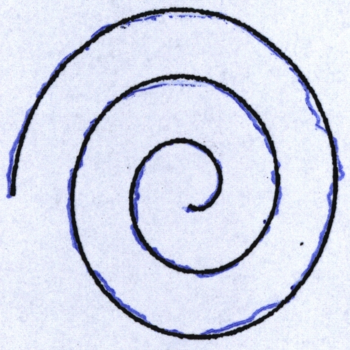

In [56]:
Image.open(path_input).resize((350,350))

### Edit by Hand

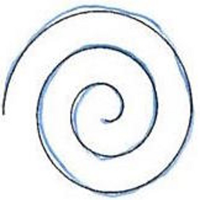

In [450]:
Image.open(path_input).resize((200,200))

In [112]:
shutil.copy(path_input , 'input/edited_img.jpg')

'input/edited_img.jpg'

In [1120]:
path = 'input/edited_img.jpg'

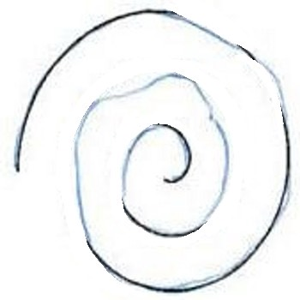

In [417]:
# after edit by hand
Image.open(path).resize((300,300))

97006
97005
97004
97003
97002
97001
97000
96999
96998
96997
96996
96995
96994
96993
96992
96991
96990
96989
96988
96987
96986
96985
96984
96983
96982
96981
96980
96979
96978
96977
96976
96975
96974
96973
96972
96971
96970
96969
96968
96967
96966
96965
96964
96963
96962
96961
96960
96959
96958
96957
96956
96955
96954
96953
96952
96951
96950
96949
96948
96947
96946
96945
96944
96943
96942
96941
96940
96939
96938
96937
96936
96935
96934
96933
96932
96931
96930
96929
96928
96927
96926
96925
96924
96923
96922
96921
96920
96919
96918
96917
96916
96915
96914
96913
96912
96911
96910
96909
96908
96907
96906
96905
96904
96903
96902
96901
96900
96899
96898
96897
96896
96895
96894
96893
96892
96891
96890
96889
96888
96887
96886
96885
96884
96883
96882
96881
96880
96879
96878
96877
96876
96875
96874
96873
96872
96871
96870
96869
96868
96867
96866
96865
96864
96863
96862
96861
96860
96859
96858
96857
96856
96855
96854
96853
96852
96851
96850
96849
96848
96847
96846
96845
96844
96843
96842
96841
9684

'output/black_white_floodfill_img.jpg'

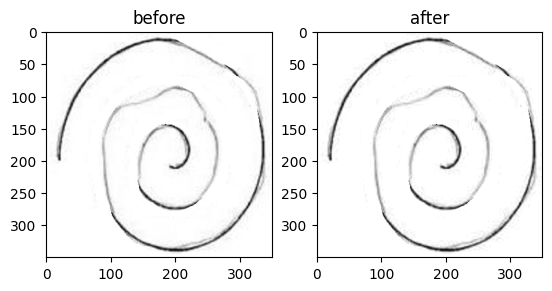

In [418]:
turn2_binary_floodfill(path)

### Running

C:\Users\Siravit\AppData\Local\Temp\ipykernel_78324\727082.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
C:\Users\Siravit\AppData\Local\Temp\ipykernel_78324\727082.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


input/HandPD/patient/sp1-P8.jpg output/filter_hsv.jpg input/HandPD/patient/sp1-P8.jpg output/removed_blackline.jpg input/HandPD/patient/sp1-P8.jpg output/merged_paper.jpg input/HandPD/patient/sp1-P8.jpg output/black_white_img.jpg 

C:\Users\Siravit\AppData\Local\Temp\ipykernel_78324\1311393658.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_row , n_col , i+1)


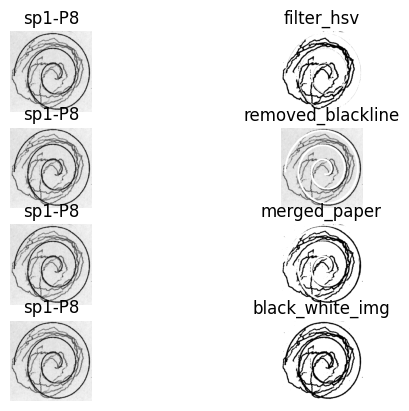

In [1612]:
all_method(path_input)

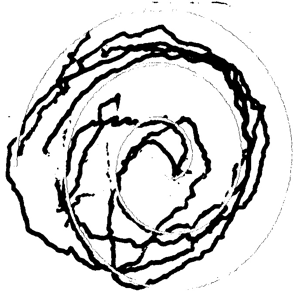

In [1613]:
Image.open(output_path1).resize((300,300))

'output/removed_blackline.jpg'

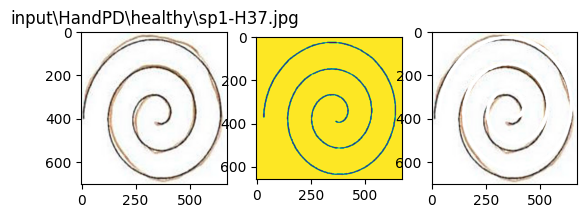

In [452]:
remove_blackline(path_input , 5)

'output/merged_paper.jpg'

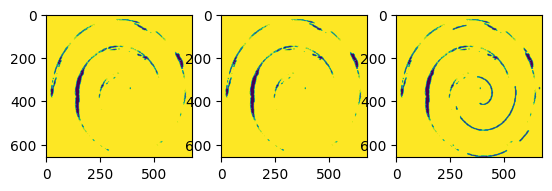

In [432]:
connect_line(output_path1 , 20)

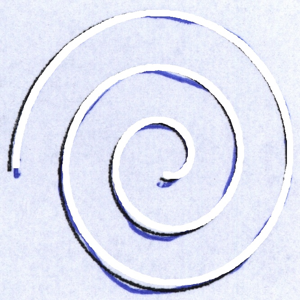

In [524]:
Image.open(output_path2).resize((300,300))

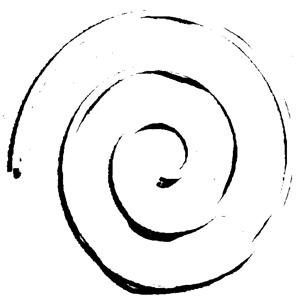

In [525]:
Image.open(output_path3).resize((300,300))

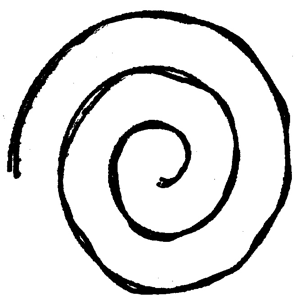

In [526]:
Image.open(output_path4).resize((300,300))

In [436]:
# turn2_binary_floodfill(path_input)

## Pushing to /done/

In [367]:
# path_input = 'input\HandPD\patient\sp2-P32.jpg'
# print(path_input)

input\HandPD\patient\sp2-P32.jpg


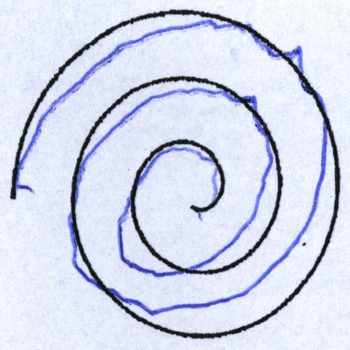

In [368]:
Image.open(path_input).resize((350,350))

In [134]:
best_approach = output_path5

In [64]:
path = 'input/edited_img.jpg'

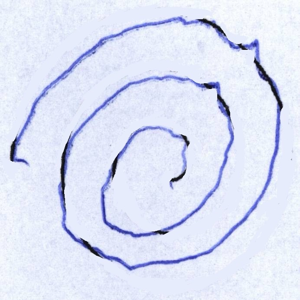

In [369]:
Image.open(path).resize((300,300))

147253
147252
147251
147250
147249
147248
147247
147246
147245
147244
147243
147242
147241
147240
147239
147238
147237
147236
147235
147234
147233
147232
147231
147230
147229
147228
147227
147226
147225
147224
147223
147222
147221
147220
147219
147218
147217
147216
147215
147214
147213
147212
147211
147210
147209
147208
147207
147206
147205
147204
147203
147202
147201
147200
147199
147198
147197
147196
147195
147194
147193
147192
147191
147190
147189
147188
147187
147186
147185
147184
147183
147182
147181
147180
147179
147178
147177
147176
147175
147174
147173
147172
147171
147170
147169
147168
147167
147166
147165
147164
147163
147162
147161
147160
147159
147158
147157
147156
147155
147154
147153
147152
147151
147150
147149
147148
147147
147146
147145
147144
147143
147142
147141
147140
147139
147138
147137
147136
147135
147134
147133
147132
147131
147130
147129
147128
147127
147126
147125
147124
147123
147122
147121
147120
147119
147118
147117
147116
147115
147114
147113
147112
147111

'output/black_white_floodfill_img.jpg'

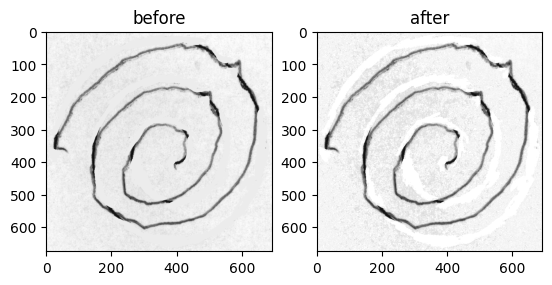

In [370]:
turn2_binary_floodfill(path)

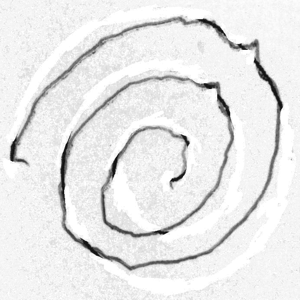

In [371]:
Image.open(best_approach).resize((300,300))

C:\Users\Siravit\AppData\Local\Temp\ipykernel_20796\1192942927.py:5: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  rsh_img = morphology.remove_small_holes(bimage,area_threshold=33)


'output/clear_noise.jpg'

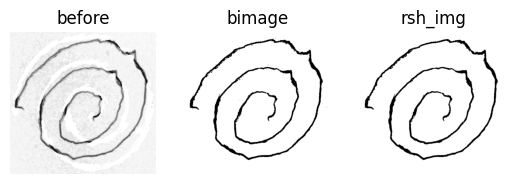

In [372]:
clear_noise(best_approach)

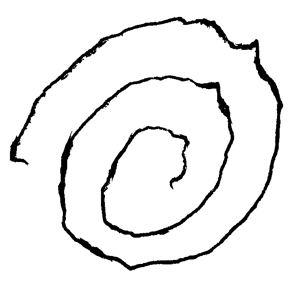

In [373]:
Image.open('output/clear_noise.jpg').resize((300,300))

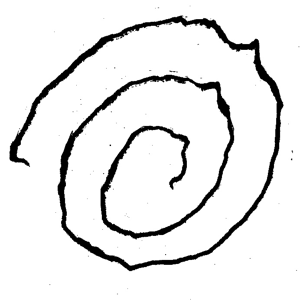

In [374]:
Image.open(turn2_binary(path , 210)).resize((300,300))

C:\Users\Siravit\AppData\Local\Temp\ipykernel_20796\1192942927.py:5: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  rsh_img = morphology.remove_small_holes(bimage,area_threshold=33)


'output/clear_noise.jpg'

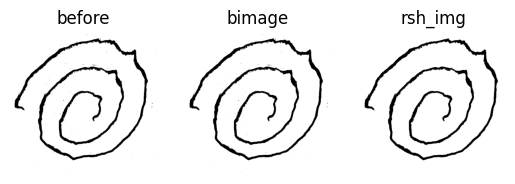

In [375]:
clear_noise(output_path4)

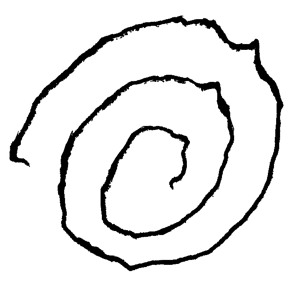

In [376]:
Image.open('output/clear_noise.jpg').resize((300,300))

In [377]:
push_to_done(path_input , 'output/clear_noise.jpg')

path : input\HandPD\patient\sp2-P32.jpg
path done : done\HandPD\patient\sp2-P32.jpg


In [462]:
# push_to_done(path_input , output_path4)

In [842]:
for i in range(0 , 140) : 
    if not op.exists(paths[i].replace('input' , 'done')) :
        print(i)
        break

# Launch Kaggle

In [11]:
grand_root = 'input/kaggle'

In [12]:
root_healthy = f"{grand_root}/healthy"
root_patient = f"{grand_root}/patient"

In [13]:
paths = [f"{root_healthy}/{name}" for name in listdir(root_healthy)] + [f"{root_patient}/{name}" for name in listdir(root_patient)]

paths[:5] , paths[-5:]

(['input/kaggle/healthy/V01HE01.png',
  'input/kaggle/healthy/V01HE02.png',
  'input/kaggle/healthy/V01HE03.png',
  'input/kaggle/healthy/V02HE01.png',
  'input/kaggle/healthy/V02HE02.png'],
 ['input/kaggle/patient/V14PE02.png',
  'input/kaggle/patient/V14PE03.png',
  'input/kaggle/patient/V15PE01.png',
  'input/kaggle/patient/V15PE02.png',
  'input/kaggle/patient/V15PE03.png'])

input/kaggle/healthy/V01HE01.png input/kaggle/healthy/V01HE02.png input/kaggle/healthy/V01HE03.png input/kaggle/healthy/V02HE01.png input/kaggle/healthy/V02HE02.png 

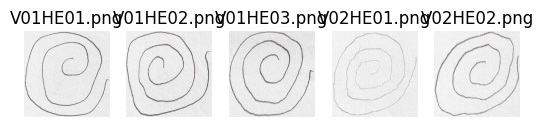

In [14]:
subplot_image_path(paths[:5] , 1  , 5)

In [15]:
if not op.exists('done/kaggle/healthy') : os.makedirs('done/kaggle/healthy')
if not op.exists('done/kaggle/patient') : os.makedirs('done/kaggle/patient')

In [16]:
for path in paths :
    img = cv2.imread(path , 0)
    transpose_img = cv2.rotate(img , cv2.ROTATE_180)
    cv2.imwrite('output/transpose_img.jpg' , transpose_img)
    # plt.imshow(transpose_img)
    
    binary_img_path = turn2_binary('output/transpose_img.jpg')
    
    done_path = path.replace('input' , 'done').replace('png' , 'jpg')
    
    shutil.copyfile(binary_img_path , done_path)
    print(done_path)

done/kaggle/healthy/V01HE01.jpg
done/kaggle/healthy/V01HE02.jpg
done/kaggle/healthy/V01HE03.jpg
done/kaggle/healthy/V02HE01.jpg
done/kaggle/healthy/V02HE02.jpg
done/kaggle/healthy/V02HE03.jpg
done/kaggle/healthy/V03HE1.jpg
done/kaggle/healthy/V03HE2.jpg
done/kaggle/healthy/V03HE3.jpg
done/kaggle/healthy/V04HE01.jpg
done/kaggle/healthy/V04HE02.jpg
done/kaggle/healthy/V04HE03.jpg
done/kaggle/healthy/V05HE01.jpg
done/kaggle/healthy/V05HE02.jpg
done/kaggle/healthy/V05HE03.jpg
done/kaggle/healthy/V06HE01.jpg
done/kaggle/healthy/V06HE02.jpg
done/kaggle/healthy/V06HE03.jpg
done/kaggle/healthy/V07HE01.jpg
done/kaggle/healthy/V07HE02.jpg
done/kaggle/healthy/V07HE03.jpg
done/kaggle/healthy/V08HE01.jpg
done/kaggle/healthy/V08HE02.jpg
done/kaggle/healthy/V08HE03.jpg
done/kaggle/healthy/V09HE01.jpg
done/kaggle/healthy/V09HE02.jpg
done/kaggle/healthy/V09HE03.jpg
done/kaggle/healthy/V10HE01.jpg
done/kaggle/healthy/V10HE02.jpg
done/kaggle/healthy/V10HE03.jpg
done/kaggle/healthy/V11HE01.jpg
done/kaggle

In [46]:
done_path = paths[0].replace('input' , 'done')
done_path

'done/kaggle/healthy/V01HE01.png'

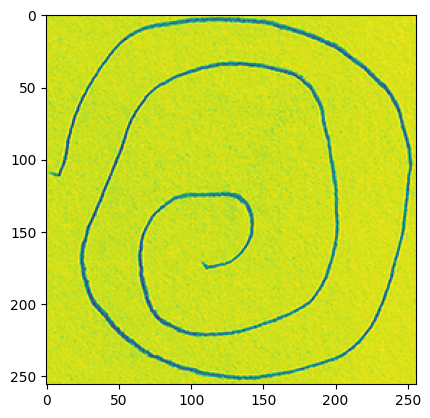

In [57]:
img = cv2.imread(paths[0] , 0)
transpose_img = cv2.rotate(img , cv2.ROTATE_180)
plt.imshow(transpose_img)

In [58]:
cv2.imwrite('done/kaggle/healthy/res1.jpg' , transpose_img)

True